In [ ]:
# importing libraries
# pip install pandas, numpy, seaborn, matplotlib, scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

#**Dataset description**

In [ ]:
# load dataset

df = pd.read_csv("f.csv")
print (f'Shape of the dataset is {df.shape}. This dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

Shape of the dataset is (1200, 12). This dataset contains 1200 rows and 12 columns.


,Location,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category
0,Countryside,1730.0,4.0,3.0,No,3.0,24.0,No,Few,19.2,Low,High
1,City Center,2092.0,1.0,2.0,No,16.0,36.0,No,Many,2.6,Low,High
2,Countryside,NaN,3.0,1.0,Yes,8.0,47.0,No,Many,NaN,Medium,Medium
3,NaN,1945.0,3.0,2.0,Yes,18.0,42.0,Yes,Few,28.8,Low,High
4,City Center,1505.0,4.0,3.0,No,4.0,37.0,No,Many,2.8,Low,High


In [ ]:
#selecting numerical features
numerical_data = df.select_dtypes(include='number') # Numerical value ala column gulare dhorse
numerical_features=numerical_data.columns.tolist() # Dhoire list e dhukaye dise
print(f'There are {len(numerical_features)} numerical features:\n{numerical_features}')

print()

#Selecting categorical features
categorical_data=df.select_dtypes(include= 'object')
categorical_features=categorical_data.columns.tolist() # Categorical gulare list e dhukaise
print(f'There are {len(categorical_features)} categorical features:\n{categorical_features}')

There are 6 numerical features:
['Size_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Floor_Number', 'Building_Age_Years', 'Distance_to_CityCenter_km']

There are 6 categorical features:
['Location', 'Has_Balcony', 'Parking_Available', 'Nearby_Schools', 'Security_Level', 'Price_Category']


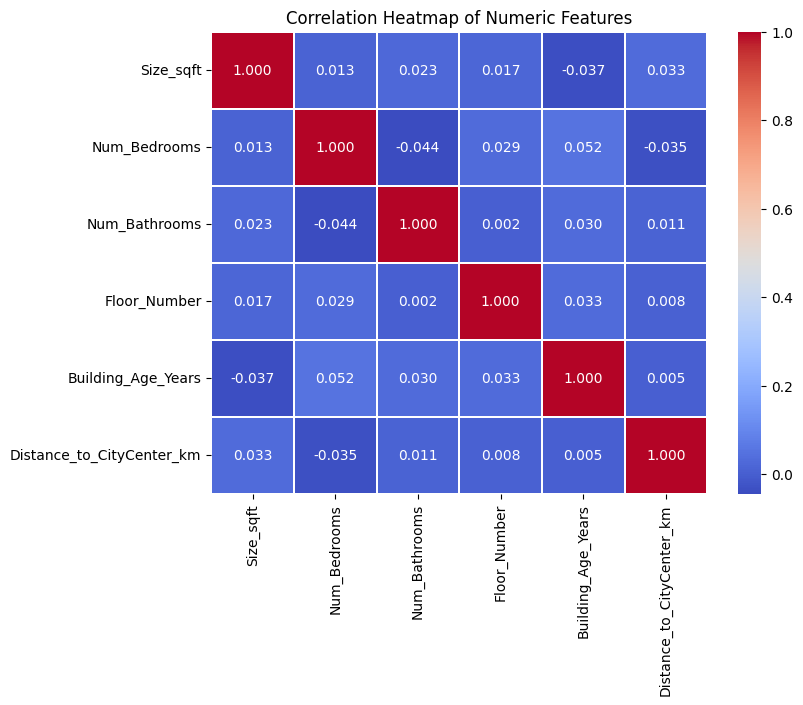

In [ ]:
# correlation analysis(heatmap)

co_matrix = df[numerical_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(co_matrix, annot=True, cmap="coolwarm", fmt='.3f', linewidths=0.3)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Price_Category
Medium    413
Low       402
High      385
Name: count, dtype: int64


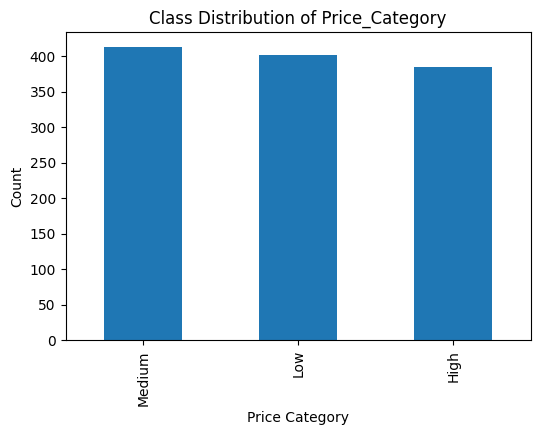

In [ ]:
# imbalanced dataset check
clas = df['Price_Category'].value_counts()
print(clas)

clas.plot(kind='bar', figsize=(6,4))
plt.title("Class Distribution of Price_Category")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()

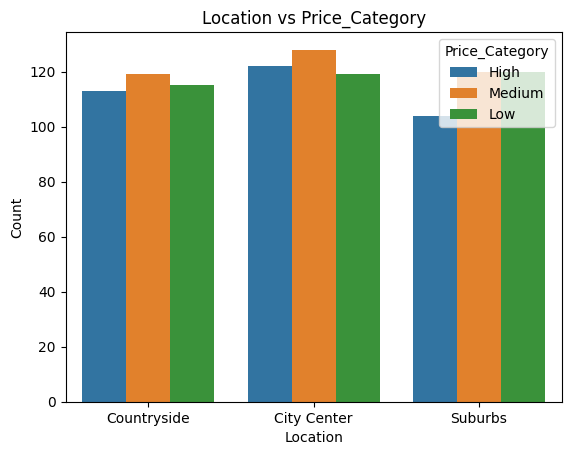

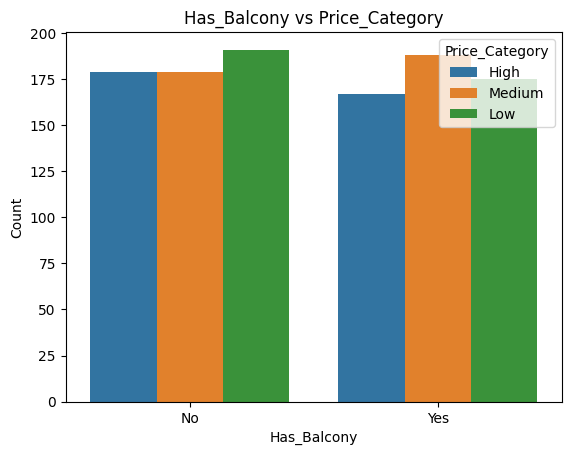

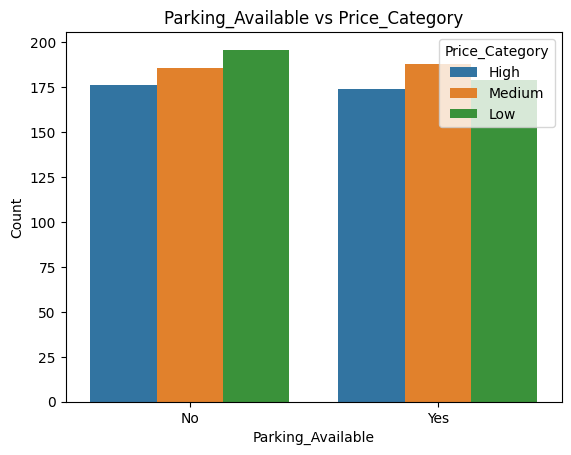

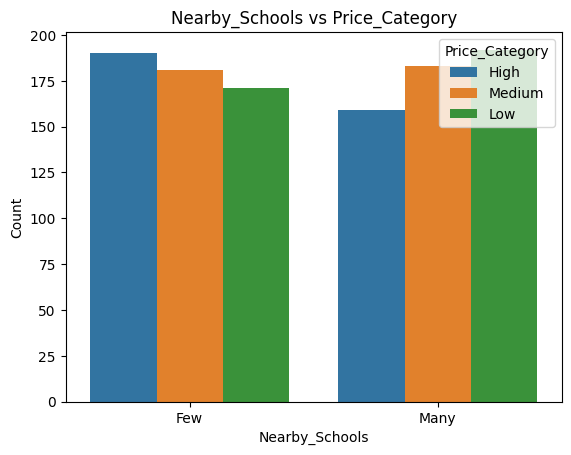

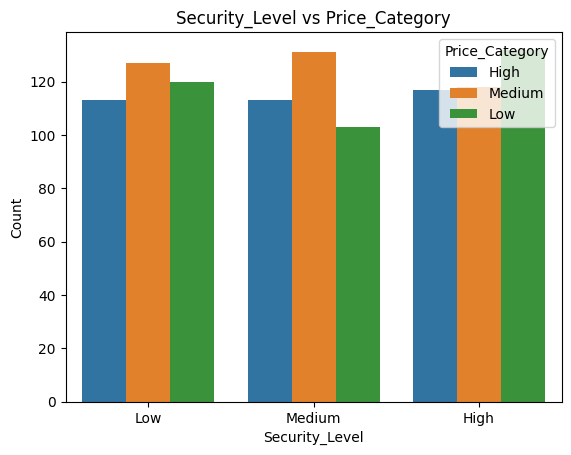

In [ ]:
# exploratory data analysis(EDA)

category = ['Location', 'Has_Balcony', 'Parking_Available', 'Nearby_Schools', 'Security_Level']

for col in category:
  plt.title(f"{col} vs Price_Category")
  sns.countplot(x=col, hue="Price_Category", data=df)
  plt.xlabel(col)
  plt.ylabel("Count")
  #plt.ylim(0, 250) # Dekhte bhallagtesilo na -.-
  plt.show()
  print()


#**Dataset pre-processing**

In [ ]:
# dataset Info

print("\nMissing values per column:\n", df.isnull().sum()) # Kon col e null koyta


Missing values per column:
 Location                     140
Size_sqft                    106
Num_Bedrooms                 136
Num_Bathrooms                143
Has_Balcony                  121
Floor_Number                 132
Building_Age_Years           127
Parking_Available            101
Nearby_Schools               124
Distance_to_CityCenter_km    103
Security_Level               126
Price_Category                 0
dtype: int64


In [ ]:
# handle null values Using Simple Imputer

# for numeric column we use mean value
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
df[numerical_features] = imputer_mean.fit_transform(df[numerical_features]) # Fit = Col er avg calculate; Transform = avg value gula boshaye dey

# for categorical cloumns use most frequent value (mode)
imputer_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[categorical_features] = imputer_mode.fit_transform(df[categorical_features]) # sem bt mode

# result
print("Missing values after imputation:\n", df.isnull().sum())
df.head()

Missing values after imputation:
 Location                     0
Size_sqft                    0
Num_Bedrooms                 0
Num_Bathrooms                0
Has_Balcony                  0
Floor_Number                 0
Building_Age_Years           0
Parking_Available            0
Nearby_Schools               0
Distance_to_CityCenter_km    0
Security_Level               0
Price_Category               0
dtype: int64


,Location,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category
0,Countryside,1730.000000,4.0,3.0,No,3.0,24.0,No,Few,19.200000,Low,High
1,City Center,2092.000000,1.0,2.0,No,16.0,36.0,No,Many,2.600000,Low,High
2,Countryside,1379.874771,3.0,1.0,Yes,8.0,47.0,No,Many,14.807475,Medium,Medium
3,City Center,1945.000000,3.0,2.0,Yes,18.0,42.0,Yes,Few,28.800000,Low,High
4,City Center,1505.000000,4.0,3.0,No,4.0,37.0,No,Many,2.800000,Low,High


In [ ]:
#Feature engineering: Categorical Encoding ******dont run this more than once******

# for data with hierarchy
# LabelEncoder() onek jhamelar so badh. only .map()
df["Has_Balcony"] = df["Has_Balcony"].map({"Yes": 1, "No": 0})
df["Parking_Available"] = df["Parking_Available"].map({"Yes": 1, "No": 0})
df["Nearby_Schools"] = df["Nearby_Schools"].map({"Many": 1, "Few": 0})
df["Security_Level"] = df["Security_Level"].map({"Low": 0, "Medium": 1, "High": 2})
df["Price_Category"] = df["Price_Category"].map({"Low": 0, "Medium": 1, "High": 2})

# for data with out hierarchy one hot
df = pd.get_dummies(df, columns=["Location"], dtype='uint8') # if Location_Countryside and Location_Suburbs == 0 then Location_City_Center == 1

print("Encoded dataframe shape:", df.shape)
df.head()

Encoded dataframe shape: (1200, 14)


,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Price_Category,Location_City Center,Location_Countryside,Location_Suburbs
0,1730.000000,4.0,3.0,0,3.0,24.0,0,0,19.200000,0,2,0,1,0
1,2092.000000,1.0,2.0,0,16.0,36.0,0,1,2.600000,0,2,1,0,0
2,1379.874771,3.0,1.0,1,8.0,47.0,0,1,14.807475,1,1,0,1,0
3,1945.000000,3.0,2.0,1,18.0,42.0,1,0,28.800000,0,2,1,0,0
4,1505.000000,4.0,3.0,0,4.0,37.0,0,1,2.800000,0,2,1,0,0


In [ ]:
#feature scaling
#scaling all numerical features values to StandardScaler

X = df.drop(columns=['Price_Category'])  #Price bade baki sob as inputs thakbe
y = df['Price_Category']  #target(price) thakbe khali

scaler = StandardScaler()
X_scaled = X.copy()   # keeping a copy for future use
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])# apply StandardScaler ONLY to numeric columns

X_scaled.head()

,Size_sqft,Num_Bedrooms,Num_Bathrooms,Has_Balcony,Floor_Number,Building_Age_Years,Parking_Available,Nearby_Schools,Distance_to_CityCenter_km,Security_Level,Location_City Center,Location_Countryside,Location_Suburbs
0,0.573249,1.397928,1.326932,0,-1.242198,0.012671,0,0,5.492466e-01,0,0,1,0
1,1.165939,-1.424454,0.037808,0,1.145216,0.904185,0,1,-1.526437e+00,0,1,0,0
2,0.000000,0.457134,-1.251316,1,-0.323962,1.721406,0,1,4.442356e-16,1,0,1,0
3,0.925261,0.457134,0.037808,1,1.512510,1.349942,1,0,1.749642e+00,0,1,0,0
4,0.204863,1.397928,1.326932,0,-1.058551,0.978478,0,1,-1.501429e+00,0,1,0,0


#**Dataset splitting**


In [ ]:
# Data Splitting
# used stratified 70/30 split. Stratified good for my selected ml models

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, stratify = y)
print(f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}")

X_train shape: (840, 13)
y_train shape: (840,)
X_test shape: (360, 13)
y_test shape: (360,)


#**Model training & testing (Supervised)**

In [ ]:
# decision tree

dt_model = DecisionTreeClassifier(random_state=42)

# train
dt_model.fit(X_train, y_train)

# test
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# logistic regrassion

log_model = LogisticRegression(max_iter=1000, random_state=42)

#train
log_model.fit(X_train, y_train)

#test
y_pred_log = log_model.predict(X_test)

In [ ]:
# neural network

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

#train
nn_model.fit(X_train, y_train)

#test
y_pred_nn = nn_model.predict(X_test)

#**Evaluation/Model selection/Comparison analysis**

Decision Tree Accuracy: 0.2777777777777778
Logistic Regression Accuracy: 0.3388888888888889
Neural Network Accuracy: 0.3472222222222222


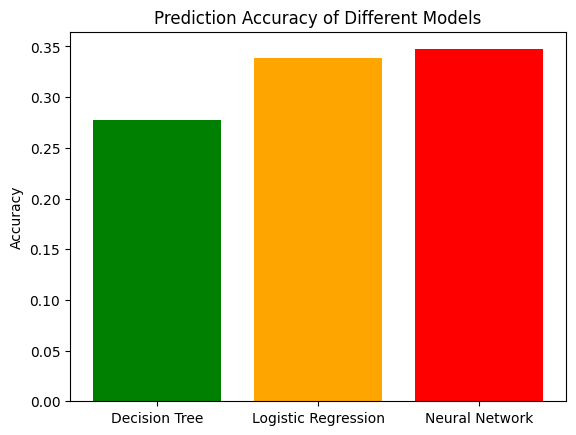

In [ ]:
#accuracy of all models
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_log = accuracy_score(y_test, y_pred_log)
acc_nn = accuracy_score(y_test, y_pred_nn)

print("Decision Tree Accuracy:", acc_dt)
print("Logistic Regression Accuracy:", acc_log)
print("Neural Network Accuracy:", acc_nn)

model_names = ["Decision Tree", "Logistic Regression", "Neural Network"]
accuracies = [acc_dt, acc_log, acc_nn]

#bar plot
bars = plt.bar(model_names, accuracies, color=["green", "orange", "red"])
plt.ylabel("Accuracy")
plt.title("Prediction Accuracy of Different Models")

plt.show()

Decision Tree Precision: 0.2785107302003608
Decision Tree Recall: 0.2777777777777778
Logistic Regression Precision: 0.3384912080713875
Logistic Regression Recall: 0.3388888888888889
Neural Network Precision: 0.3466320683889337
Neural Network Recall: 0.3472222222222222


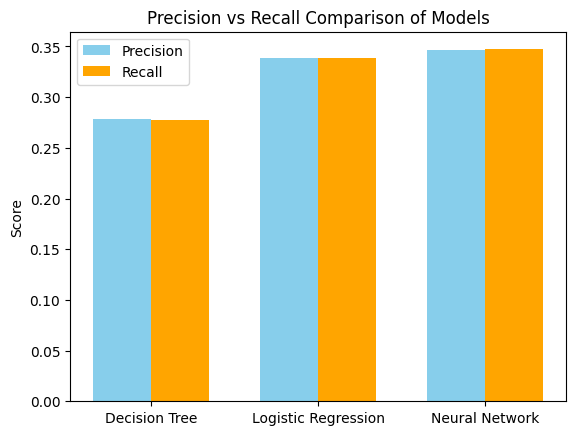

In [ ]:
#Precision & Recall

# Decision Tree
prec_dt = precision_score(y_test, y_pred_dt, average="weighted")
rec_dt  = recall_score(y_test, y_pred_dt, average="weighted")

# Logistic Regression
prec_log = precision_score(y_test, y_pred_log, average="weighted")
rec_log  = recall_score(y_test, y_pred_log, average="weighted")

# Neural Network
prec_nn = precision_score(y_test, y_pred_nn, average="weighted")
rec_nn  = recall_score(y_test, y_pred_nn, average="weighted")

print("Decision Tree Precision:", prec_dt)
print("Decision Tree Recall:", rec_dt)

print("Logistic Regression Precision:", prec_log)
print("Logistic Regression Recall:", rec_log)

print("Neural Network Precision:", prec_nn)
print("Neural Network Recall:", rec_nn)

# bar plot
x = [0, 1, 2]   # positions for Decision Tree, Logistic Regression, Neural Network
bar_width = 0.35

plt.bar([0 - bar_width/2, 1 - bar_width/2, 2 - bar_width/2],
        [prec_dt, prec_log, prec_nn],
        width=bar_width, label="Precision", color="skyblue")

plt.bar([0 + bar_width/2, 1 + bar_width/2, 2 + bar_width/2],
        [rec_dt, rec_log, rec_nn],
        width=bar_width, label="Recall", color="orange")

plt.xticks(x, ["Decision Tree", "Logistic Regression", "Neural Network"])
plt.ylabel("Score")
plt.title("Precision vs Recall Comparison of Models")
plt.legend()

plt.show()

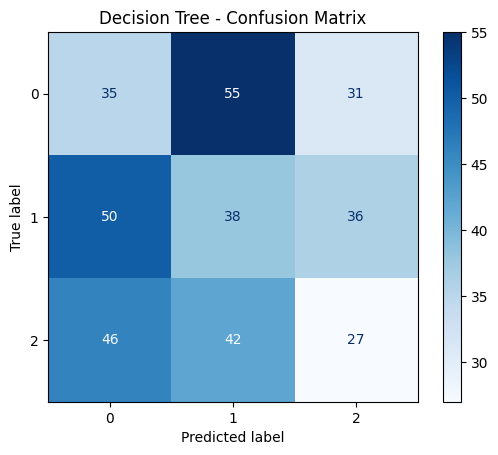

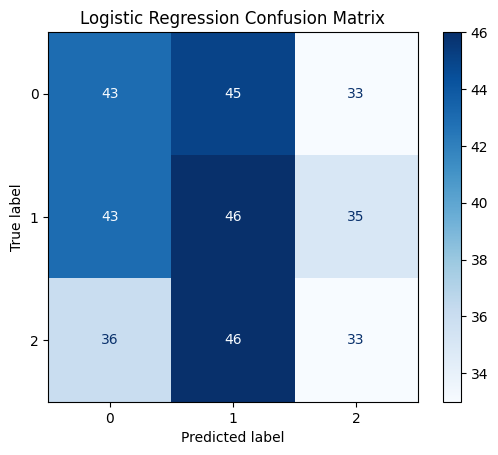

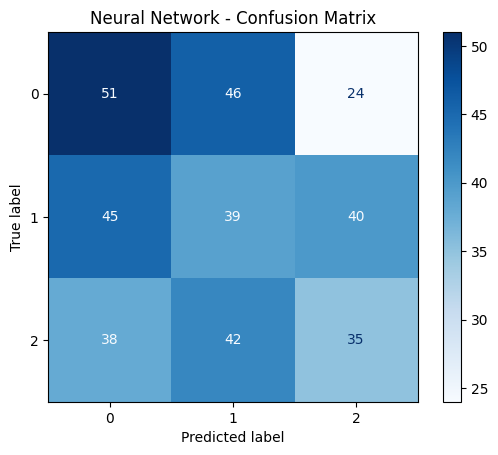

In [ ]:
#Confusion Matrix

class_labels = np.unique(y_test)

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=class_labels).plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=class_labels).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn, display_labels=class_labels).plot(cmap="Blues")
plt.title("Neural Network - Confusion Matrix")
plt.show()

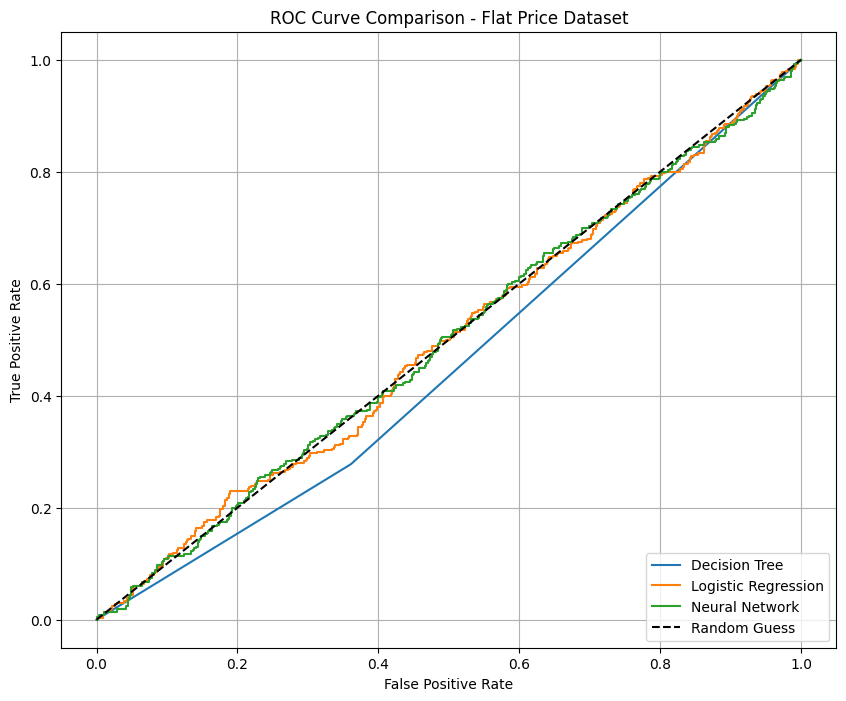

Macro-average ROC AUC Scores:
Decision Tree: 0.457
Logistic Regression: 0.494
Neural Network: 0.501


In [ ]:
#AUC score, ROC curve for each model (for classification)
# eda thik korrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr
#rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr

# Binarize the output for multiclass ROC (One-vs-Rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 8))

# Decision Tree
y_pred_dt_proba_all = dt_model.predict_proba(X_test)
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_pred_dt_proba_all.ravel())
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree")

# Logistic Regression
y_pred_log_proba_all = log_model.predict_proba(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test_bin.ravel(), y_pred_log_proba_all.ravel())
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression")

# Neural Network
y_pred_nn_proba_all = nn_model.predict_proba(X_test)
fpr_nn, tpr_nn, _ = roc_curve(y_test_bin.ravel(), y_pred_nn_proba_all.ravel())
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network")

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot setup
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Flat Price Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print macro-average AUC scores
print("Macro-average ROC AUC Scores:")
print(f"Decision Tree: {roc_auc_score(y_test, y_pred_dt_proba_all, multi_class='ovr', average='macro'):.3f}")
print(f"Logistic Regression: {roc_auc_score(y_test, y_pred_log_proba_all, multi_class='ovr', average='macro'):.3f}")
print(f"Neural Network: {roc_auc_score(y_test, y_pred_nn_proba_all, multi_class='ovr', average='macro'):.3f}")

# **K-Means Clustering**

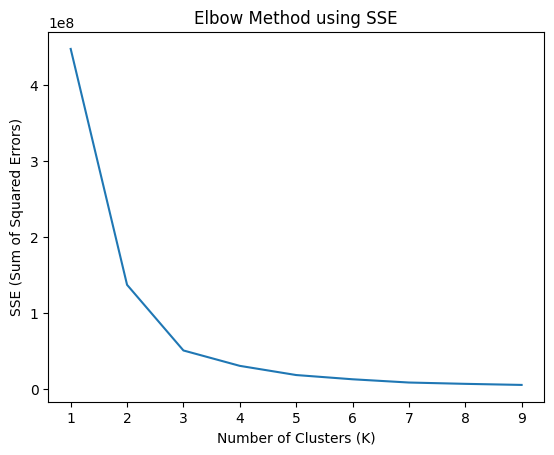

In [ ]:
# using elbow method to get the value of K

X_kmeans = X.copy()

# Store SSE for different K
sse = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters = k,random_state=42, n_init=10)
    km.fit(X_kmeans)
    sse.append(km.inertia_)  # inertia = SSE

# Plot Elbow Curve
plt.plot(K_range, sse)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method using SSE")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


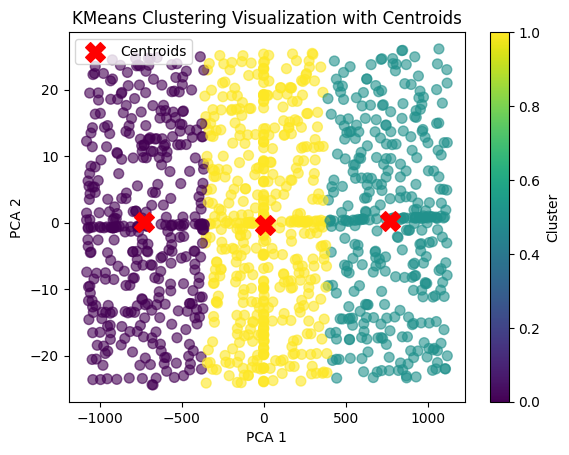

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster = 3
km = KMeans(n_clusters=cluster, random_state=42, n_init=10)
clusters = km.fit_predict(X_kmeans)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

centroids_pca = pca.transform(km.cluster_centers_)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", s=50, alpha=0.6)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1],
            c="red", marker="X", s=200, label="Centroids")
plt.title("KMeans Clustering Visualization with Centroids")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.legend()
plt.show()
